<a href="https://colab.research.google.com/github/Kundan71/Deep-Learning-Projects/blob/main/obj_det_cifae10_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## History

The history of Convolutional Neural Networks (CNNs) can be traced back to the development of artificial neural networks and their connection to the biological visual cortex. Here are some significant milestones in the development of CNNs:

1. **1959 - Hubel and Wiesel's experiments:** The neurophysiologists David Hubel and Torsten Wiesel conducted experiments on the visual cortex of cats, discovering simple and complex cells. Simple cells responded primarily to oriented edges and bars, while complex cells exhibited spatial invariance.


2. **1980 - Neocognitron:** Inspired by Hubel and Wiesel's work, Kunihiko Fukushima developed the Neocognitron, a hierarchical, multilayered artificial neural network. It had alternating convolutional and downsampling (pooling) layers, which formed the basis for modern CNNs.


3. **1989 - LeNet-1:** Yann LeCun developed LeNet-1, the first practical implementation of a CNN for handwritten character recognition. The network used backpropagation for training and introduced the concept of shared weights in the convolutional layers.


4. **1998 - LeNet-5:** LeCun and his team improved upon their previous work and proposed LeNet-5, which became a widely adopted CNN for digit recognition tasks. It was used for reading zip codes, digits, and handwriting on checks.


5. **2006 - Deep Learning Revolution:** Geoff Hinton and his collaborators introduced the concept of deep learning, which led to a renewed interest in CNNs and other deep neural network architectures.


6. **2012 - AlexNet:** Alex Krizhevsky, Ilya Sutskever, and Geoff Hinton developed AlexNet, a deeper and wider CNN that significantly outperformed other models in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC). This marked the beginning of the modern deep learning era, as CNNs became the go-to choice for image recognition tasks.


7. **2014 - VGG, GoogLeNet:** Researchers developed deeper and more complex CNN architectures, such as VGGNet by the Visual Geometry Group at Oxford and GoogLeNet (Inception) by researchers at Google. These architectures achieved even better performance on image classification tasks.


8. **2015 - ResNet:** Kaiming He and his team from Microsoft Research introduced ResNet (Residual Network), which employed residual connections (skip connections) to enable the training of very deep networks with hundreds of layers. ResNet won the ILSVRC in 2015 and set new records in image classification and object detection.

Since then, CNNs have continued to evolve, and researchers have developed numerous variants and improvements. Today, CNNs are used in a wide range of applications, such as image recognition, object detection, video analysis, and more.

## Convolution

In the context of Convolutional Neural Networks (CNNs), convolution refers to a mathematical operation that combines an input (usually an image or a feature map) with a filter (also called a kernel) to produce a transformed output called a feature map or convolved feature. This operation is performed to extract useful features, such as edges, textures, or patterns, from the input data. Convolution is the primary building block of CNNs and is what makes them particularly well-suited for image and pattern recognition tasks.


Let's denote the input feature map as $I$ and the filter (kernel) as $K$. The dimensions of $I$ are $(W, H)$ and the dimensions of $K$ are $(F_w, F_h)$. The resulting output feature map, $O$, will have dimensions $(W - F_w + 1, H - F_h + 1)$ if we use a stride of 1 and no padding.

For each position $(i, j)$ in the output feature map $O$, the value is computed as:

$$O(i, j) = \sum_{m=0}^{F_w-1} \sum_{n=0}^{F_h-1} I(i+m, j+n) \cdot K(m, n)$$

Here, the double summation represents the element-wise multiplication and summation of the overlapping regions of the input feature map $I$ and the filter $K$.

![Alt Text](../Figures/ImpartialDecimalBarnswallow-max-1mb.gif)

If we use a stride of $S$ and padding of $P$, the dimensions of the output feature map $O$ will change to:

$$O_w = \frac{(W - F_w + 2*P)}{S} + 1$$


$$O_h = (H - F_h + 2*P) / S + 1$$


## LeNet-5

![Alt Text](../Figures/lenet5.png)


The architecture of LeNet-5 consists of seven layers, including the input layer. Here is a brief overview of each layer:

1. **Input layer:** This layer accepts a grayscale image of size 32x32 pixels. The original images were of size 28x28 pixels, but they were padded to 32x32 pixels to allow the first convolutional layer to detect features on the edges of the image.

2. **C1 (Convolutional layer):** The first convolutional layer has six kernels (filters) of size 5x5. The layer applies these filters to the input image, resulting in six feature maps of size 28x28. The activation function used in this layer is typically hyperbolic tangent (tanh) or sigmoid.

3. **S2 (Pooling layer):** This layer, also known as subsampling or downsampling layer, follows the first convolutional layer. It has six 2x2 pooling kernels with a stride of 2. The pooling operation can be average or max pooling. After applying the pooling operation, the output feature maps have a size of 14x14.

4. **C3 (Convolutional layer):** The second convolutional layer has 16 kernels of size 5x5. The layer applies these filters to the pooled feature maps from the previous layer, resulting in 16 output feature maps of size 10x10. Again, the activation function used in this layer is typically tanh or sigmoid.

5. **S4 (Pooling layer):** This layer is similar to the S2 layer, but it operates on the 16 feature maps from the C3 layer. It has sixteen 2x2 pooling kernels with a stride of 2, and the output feature maps have a size of 5x5.

6. **C5 (Convolutional layer):** The third convolutional layer has 120 kernels of size 5x5. Since the input feature maps are also 5x5, this layer acts as a fully connected layer. The output is a single feature map of size 1x1 with 120 channels.

7. **F6 (Fully connected layer):** This layer has 84 neurons that are fully connected to the 120 channels from the C5 layer. The activation function used is usually tanh or sigmoid.

8. **Output layer:** The output layer is a fully connected layer with a number of neurons equal to the number of classes in the classification task (e.g., 10 neurons for digit recognition). This layer typically uses the softmax activation function to produce class probabilities.

In [ ]:
Use the Yale Face and CIFAR10 dataset to build CNN models for face and object recognition respectively. You should:

1. Experiment with different architectures, learning rates, epochs, and optimizers (Adam vs. SGD) to find the optimal configuration.

2. Monitor the loss curves to avoid overfitting and ensure the models learn appropriately from the training data.

3. Evaluate the models using precision, recall, F1 score, and AUC metrics.

For both tasks, document all experiments, including changes in model configurations, learning rates, epochs, and optimizers, along with the resulting performance metrics. Your submission should include a detailed markdown commentary on your observations and opinions regarding model performance, diagnostics, and any challenges encountered during the assignment. Highlight any significant findings, surprises, or lessons learned through the experimentation process.

Submit the final notebook containing the implemented models, diagnostics, evaluations, visualizations, and your comprehensive analysis.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


<ipython-input-12-4554bac05cb7>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


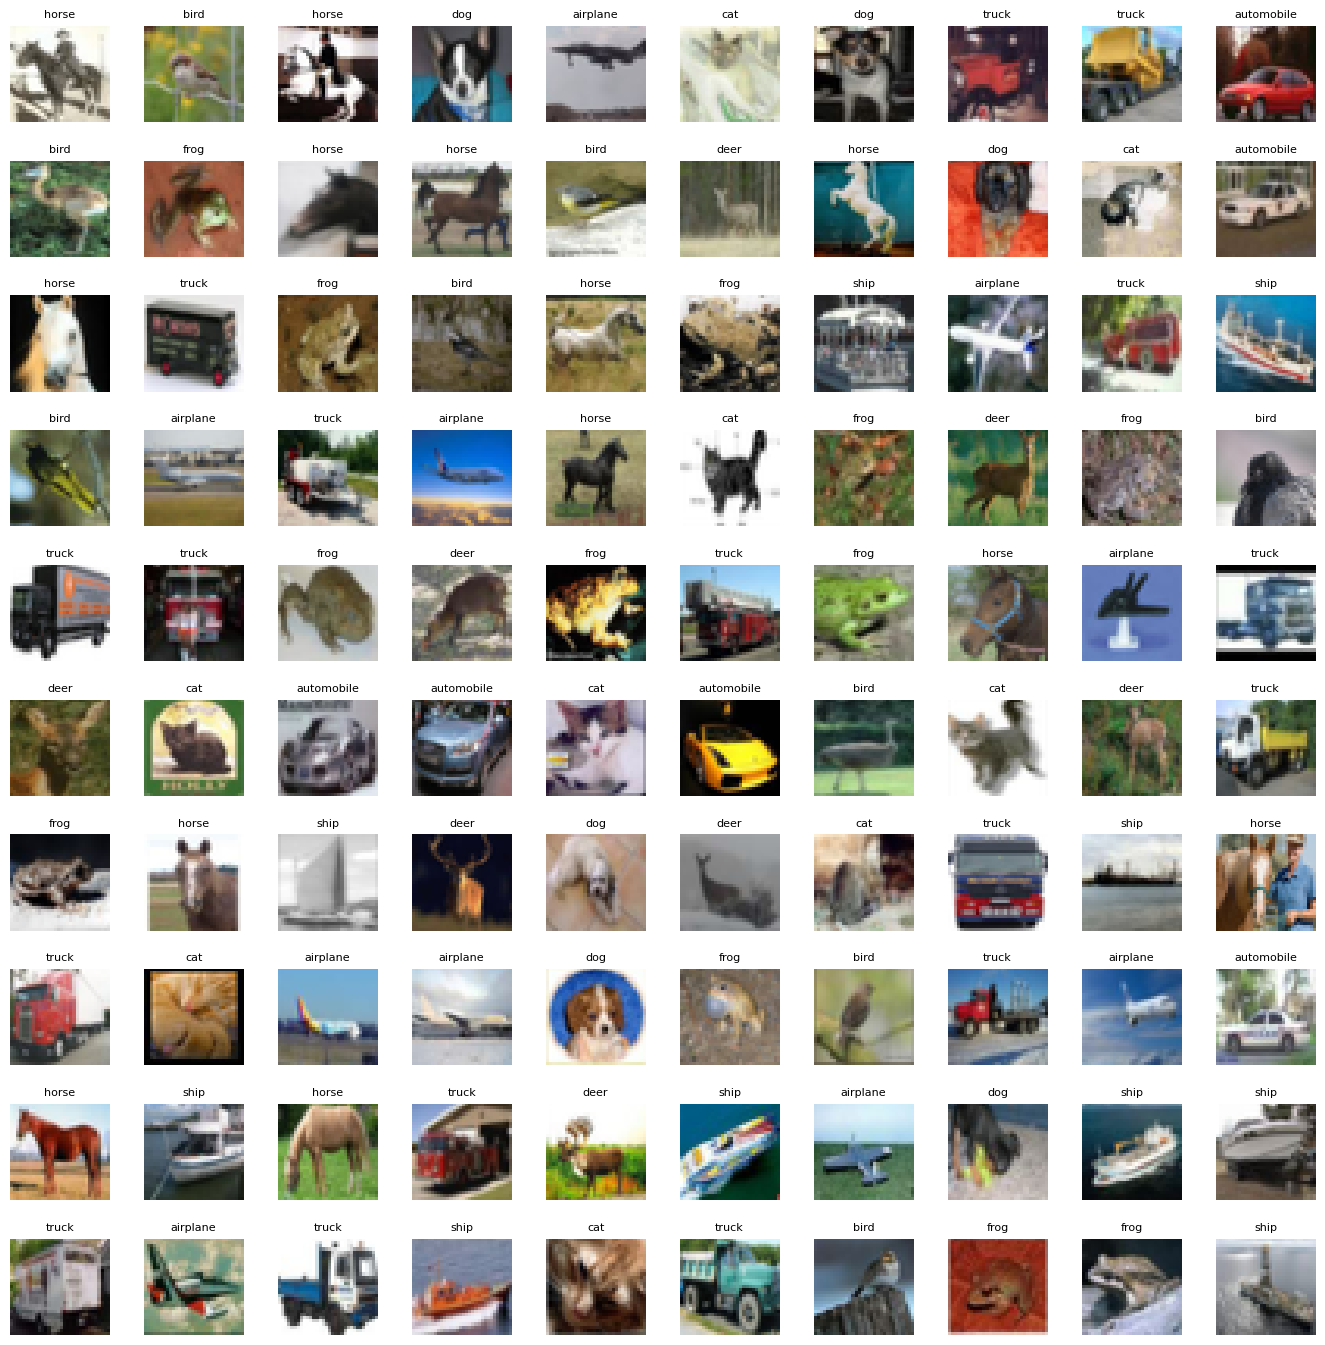

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                      

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 529s 335ms/step - loss: 1.6426 - accuracy: 0.4035 - precision: 0.6155 - recall: 0.1908 - val_loss: 1.2916 - val_accuracy: 0.5233 - val_precision: 0.6924 - val_recall: 0.3473
Epoch 2/50
1562/1562 [==============================] - 537s 344ms/step - loss: 1.2315 - accuracy: 0.5633 - precision: 0.7290 - recall: 0.3982 - val_loss: 1.1606 - val_accuracy: 0.5998 - val_precision: 0.7111 - val_recall: 0.4839
Epoch 3/50
1562/1562 [==============================] - 485s 310ms/step - loss: 1.0346 - accuracy: 0.6415 - precision: 0.7732 - recall: 0.5124 - val_loss: 1.0420 - val_accuracy: 0.6529 - val_precision: 0.7369 - val_recall: 0.5720
Epoch 4/50
1562/1562 [==============================] - 485s 310ms/step - loss: 0.9337 - accuracy: 0.6784 - precision: 0.7934 - recall: 0.5671 - val_loss: 0.8892 - val_accuracy: 0.6897 - val_precision: 0.7874 - val_recall: 0.6127
Epoch 5/50
1562/1562 [==============================] - 506s 324ms/step - loss: 

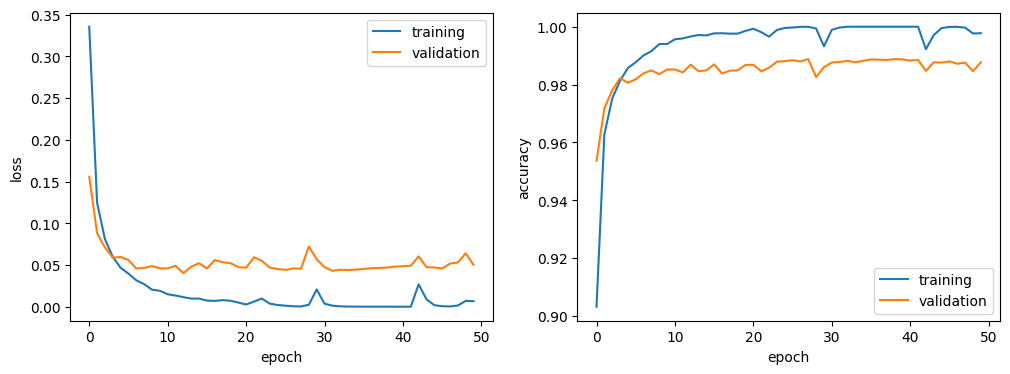

In [ ]:
## history - r
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

### **Model 2**

In [ ]:
from keras import optimizers
optm = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the LeNet-5 model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.ZeroPadding2D(padding=(2, 2)),  # Pad the images to 32x32
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


#### Model Evaluation

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0501 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


A confusion matrix, also known as an error matrix, is a table used to describe the performance of a classification model on a set of data for which the true values are known. It is particularly useful for understanding the performance of a classifier in the context of multiclass classification problems.

The confusion matrix is organized with rows representing the true (actual) classes and columns representing the predicted classes. Each cell in the matrix corresponds to the count of instances for which the true class (row) was predicted as the corresponding predicted class (column).

For a binary classification problem, the confusion matrix has the following structure:


|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive | True Positives (TP)| False Negatives (FN)|
| Actual Negative | False Positives (FP)| True Negatives (TN) |


Here, the terms are defined as follows:

- **True Positives (TP):** The number of instances correctly predicted as positive (i.e., the classifier correctly identified the positive instances).

- **True Negatives (TN):** The number of instances correctly predicted as negative (i.e., the classifier correctly identified the negative instances).

- **False Positives (FP):** The number of instances predicted as positive but are actually negative (i.e., the classifier incorrectly identified positive instances).

- **False Negatives (FN):** The number of instances predicted as negative but are actually positive (i.e., the classifier incorrectly identified negative instances).

Confusion matrices can be easily extended to multiclass classification problems, with one row and one column for each class. Various performance metrics, such as accuracy, precision, recall, and F1-score, can be calculated from the values in the confusion matrix.


313/313 [==============================] - 1s 4ms/step


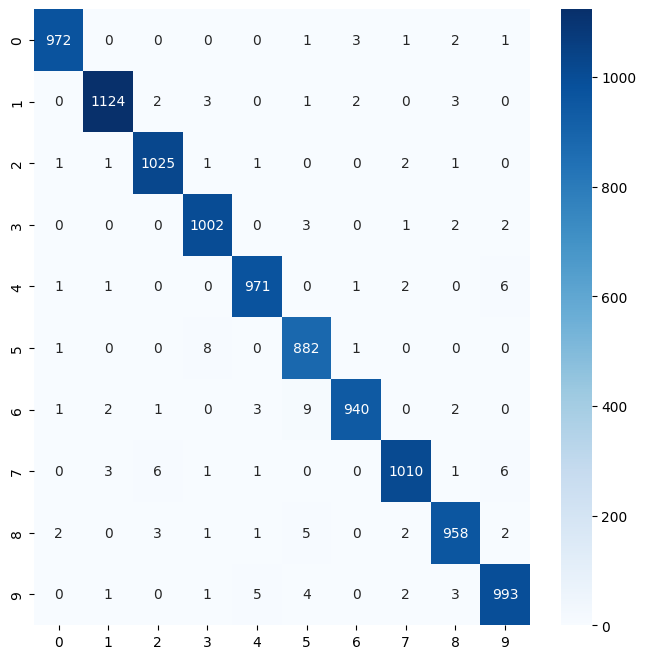

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

plt.figure(figsize=(8, 8))

sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Blues', annot=True, fmt='d')
plt.show()

Precision, recall, and F1-score are popular metrics used to evaluate the performance of classification algorithms, especially in the context of binary classification. Here are their formulas:

1. **Precision:** Precision is the ratio of true positive predictions to the total positive predictions made by the classifier. It is also known as positive predictive value (PPV).

$$Precision = \frac{TP}{TP + FP}$$

2. **Recall:** Recall is the ratio of true positive predictions to the total actual positive instances. It is also known as sensitivity, hit rate, or true positive rate (TPR).

$$Recall = \frac{TP}{TP + FN}$$

3. **F1-score:** F1-score is the harmonic mean of precision and recall. It is used as a single metric that balances the trade-off between precision and recall. F1-score is especially useful when dealing with imbalanced datasets, where one class is significantly more frequent than the other.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
cnn = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(6, (3, 3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(12, (3, 3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(18, (3, 3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 12)        660       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 18)          1962      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 18)          0

2024-04-09 07:48:07.132303: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
optim = Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(X_train, y_train, epochs=35, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/35
469/469 [==============================] - 5s 9ms/step - loss: 0.7450 - accuracy: 0.7631 - val_loss: 0.2531 - val_accuracy: 0.9220
Epoch 2/35
469/469 [==============================] - 4s 8ms/step - loss: 0.2671 - accuracy: 0.9197 - val_loss: 0.1837 - val_accuracy: 0.9447
Epoch 3/35
469/469 [==============================] - 4s 8ms/step - loss: 0.2020 - accuracy: 0.9389 - val_loss: 0.1520 - val_accuracy: 0.9548
Epoch 4/35
469/469 [==============================] - 4s 8ms/step - loss: 0.1699 - accuracy: 0.9490 - val_loss: 0.1293 - val_accuracy: 0.9603
Epoch 5/35
469/469 [==============================] - 4s 8ms/step - loss: 0.1492 - accuracy: 0.9543 - val_loss: 0.1170 - val_accuracy: 0.9655
Epoch 6/35
469/469 [==============================] - 4s 8ms/step - loss: 0.1326 - accuracy: 0.9603 - val_loss: 0.1175 - val_accuracy: 0.9639
Epoch 7/35
469/469 [==============================] - 4s 8ms/step - loss: 0.1190 - accuracy: 0.9635 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 

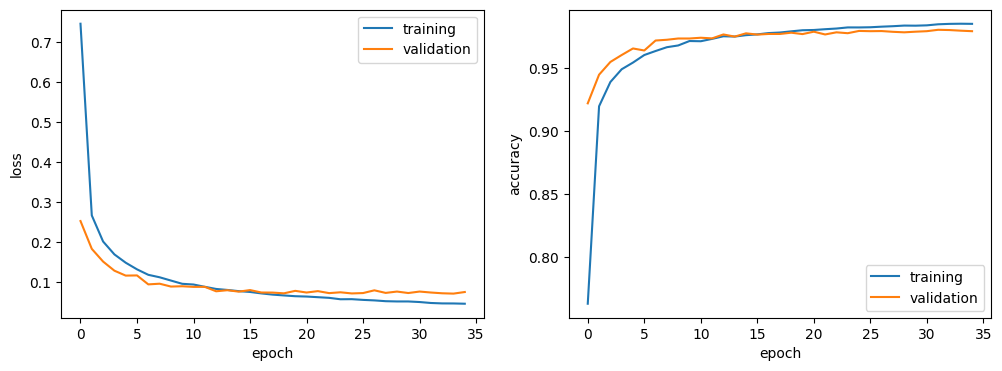

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0761 - accuracy: 0.9792
Test accuracy: 0.979200005531311


313/313 [==============================] - 1s 3ms/step


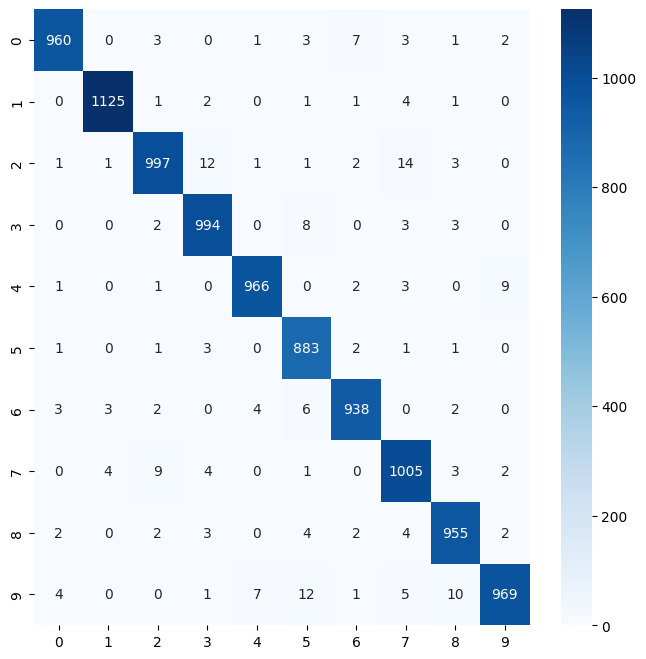

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(cnn.predict(X_test), axis=1)

plt.figure(figsize=(8, 8))

sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Blues', annot=True, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

